# EDA

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/etna-team/etna/master?filepath=examples/103-EDA.ipynb)

This notebook contains the simple examples of EDA (exploratory data analysis) using ETNA library.

**Table of contents**

* [Loading dataset](#chapter1)  
* [Visualization](#chapter2)
    * [Plotting time series](#section_2_1)
    * [Autocorrelation & partial autocorrelation](#section_2_2)
    * [Cross-correlation](#section_2_3)
    * [Correlation heatmap](#section_2_4)
    * [Distribution](#section_2_5)
    * [Trend](#section_2_6)
    * [Seasonality](#section_2_7)
* [Outliers](#chapter3)
    * [Median method](#section_3_1)
    * [Density method](#section_3_2)
* [Change Points](#chapter4)    

In [33]:
import pandas as pd

from etna.datasets.tsdataset import TSDataset
from etna.transforms import LagTransform
from etna.transforms import LinearTrendTransform

## 1. Loading dataset <a class="anchor" id="chapter1"></a>

Let's load and look at the dataset

In [34]:
classic_df = pd.read_csv("data/example_dataset.csv")
classic_df.head()

,timestamp,segment,target
0,2019-01-01,segment_a,170
1,2019-01-02,segment_a,243
2,2019-01-03,segment_a,267
3,2019-01-04,segment_a,287
4,2019-01-05,segment_a,279


In [35]:
classic_df['segment'].unique() # 4 временных ряда

array(['segment_a', 'segment_b', 'segment_c', 'segment_d'], dtype=object)

Our library works with the special data structure `TSDataset`. Let's create it as it was done in "Get started" notebook.

In [36]:
df = TSDataset.to_dataset(classic_df)
ts = TSDataset(df, freq="D")
ts.head(5)

segment,segment_a,segment_b,segment_c,segment_d
feature,target,target,target,target
timestamp,,,,
2019-01-01,170,102,92,238
2019-01-02,243,123,107,358
2019-01-03,267,130,103,366
2019-01-04,287,138,103,385
2019-01-05,279,137,104,384


In [37]:
ts.columns

MultiIndex([('segment_a', 'target'),
            ('segment_b', 'target'),
            ('segment_c', 'target'),
            ('segment_d', 'target')],
           names=['segment', 'feature'])

`TSDataset` has its own implementations of `describe` and `info` methods that gives information about distinct time series.

In [38]:
ts.describe()

,start_timestamp,end_timestamp,length,num_missing,num_segments,num_exogs,num_regressors,num_known_future,freq
segments,,,,,,,,,
segment_a,2019-01-01,2019-11-30,334,0,4,0,0,0,D
segment_b,2019-01-01,2019-11-30,334,0,4,0,0,0,D
segment_c,2019-01-01,2019-11-30,334,0,4,0,0,0,D
segment_d,2019-01-01,2019-11-30,334,0,4,0,0,0,D


In [39]:
ts.info()

<class 'etna.datasets.TSDataset'>
num_segments: 4
num_exogs: 0
num_regressors: 0
num_known_future: 0
freq: D
          start_timestamp end_timestamp  length  num_missing
segments                                                    
segment_a      2019-01-01    2019-11-30     334            0
segment_b      2019-01-01    2019-11-30     334            0
segment_c      2019-01-01    2019-11-30     334            0
segment_d      2019-01-01    2019-11-30     334            0


## 2. Visualization <a class="anchor" id="chapter2"></a>

### 2.1 Plotting time series <a class="anchor" id="section_2_1"></a>

Let's take a look at the time series in the dataset

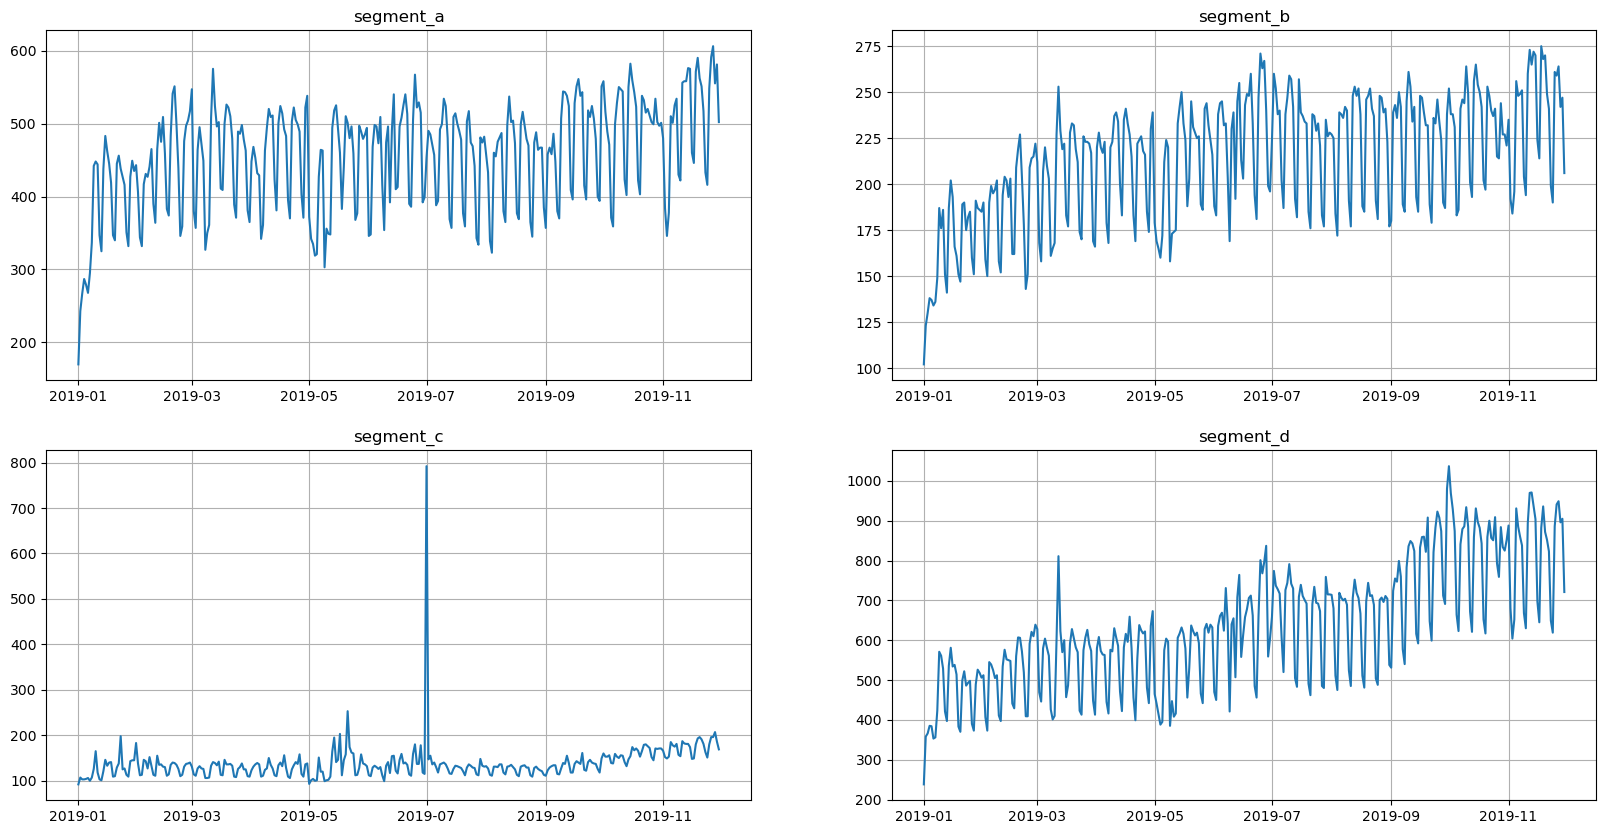

In [40]:
ts.plot()

### 2.2 Autocorrelation & partial autocorrelation<a class="anchor" id="section_2_2"></a>

Autocorrelation function(**AFC**) describes the direct relationship between an observation and its lag. The AFC plot can help to identify the extent of the lag in moving average models.

Partial autocorrelation function(**PAFC**) describes the direct relationship between an observation and its lag. The PAFC plot can help to identify the extent of the lag in autoregressive models.

Let's observe the AFC and PAFC plot for our time series, specifying the maximum number of lags

In [41]:
from etna.analysis import acf_plot
from etna.analysis import plot_correlation_matrix

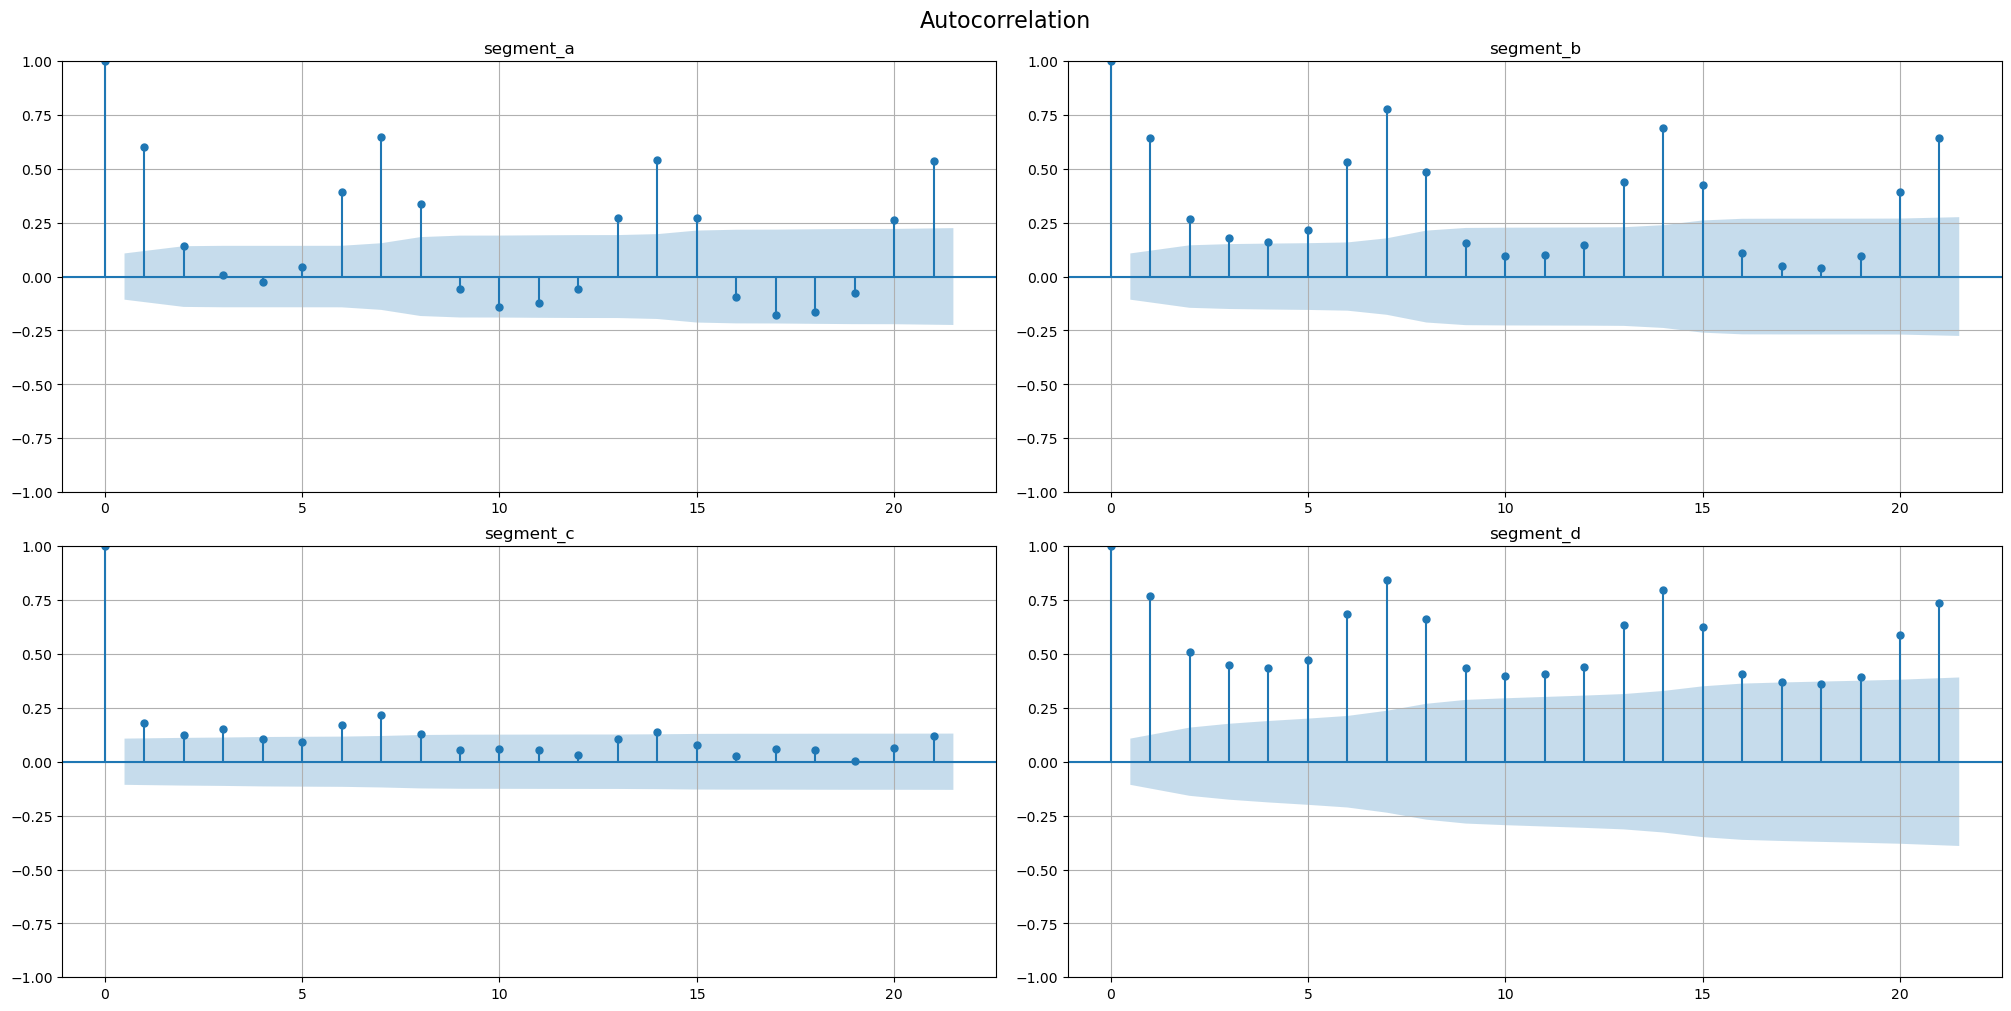

In [42]:
acf_plot(ts, lags=21)

### 2.4 Correlation heatmap <a class="anchor" id="section_2_4"></a>

Correlation heatmap is a visualization of pairwise correlation matrix between timeseries in a dataset. It is a simple visual tool which you may use to determine the correlated timeseries in your dataset. 

Let's take a look at the correlation heatmap, adding lags columns to the dataset to catch the series that are correlated but with some shift.

In [60]:
lags = LagTransform(in_column="target", lags=[7, 3], out_column="lag")
ts.fit_transform([lags])

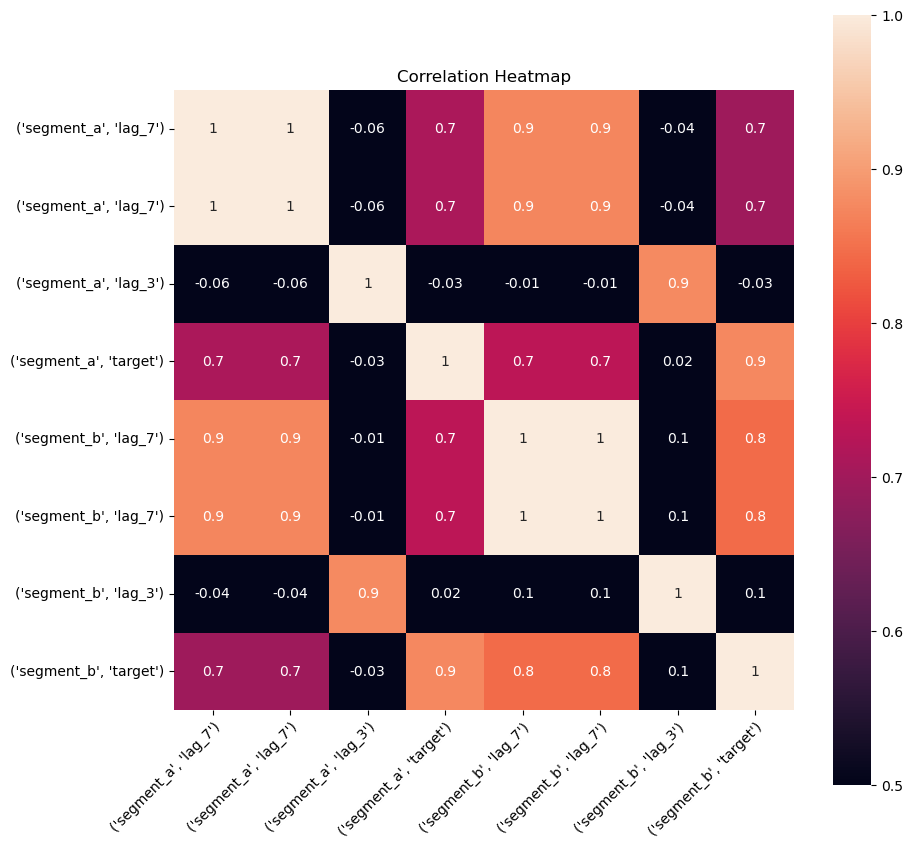

In [61]:
plot_correlation_matrix(ts, segments=["segment_a", "segment_b"], method="spearman", vmin=0.5, vmax=1)

### 2.5 Trend <a class="anchor" id="section_2_6"></a>

Time series have such an important characteristic as a trend. Using `plot_trend`, you can visualize the trend for each segment and select the appropriate model to describe it. 

For example, let's build a linear and parabolic trend.

In [45]:
from etna.analysis import plot_trend

In [46]:
trends = [
    LinearTrendTransform(in_column="target", poly_degree=1),
    LinearTrendTransform(in_column="target", poly_degree=2)
]

/opt/miniconda3/envs/py39/lib/python3.9/site-packages/etna/transforms/decomposition/detrend.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result[self.in_column] = no_trend_timeseries
/opt/miniconda3/envs/py39/lib/python3.9/site-packages/etna/transforms/decomposition/detrend.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result[self.in_column] = no_trend_timeseries
/opt/miniconda3/envs/py39/lib/python3.9/site-packages/etna/transforms/decomposition/detrend.py:92: SettingWithCopyWarning: 
A value 

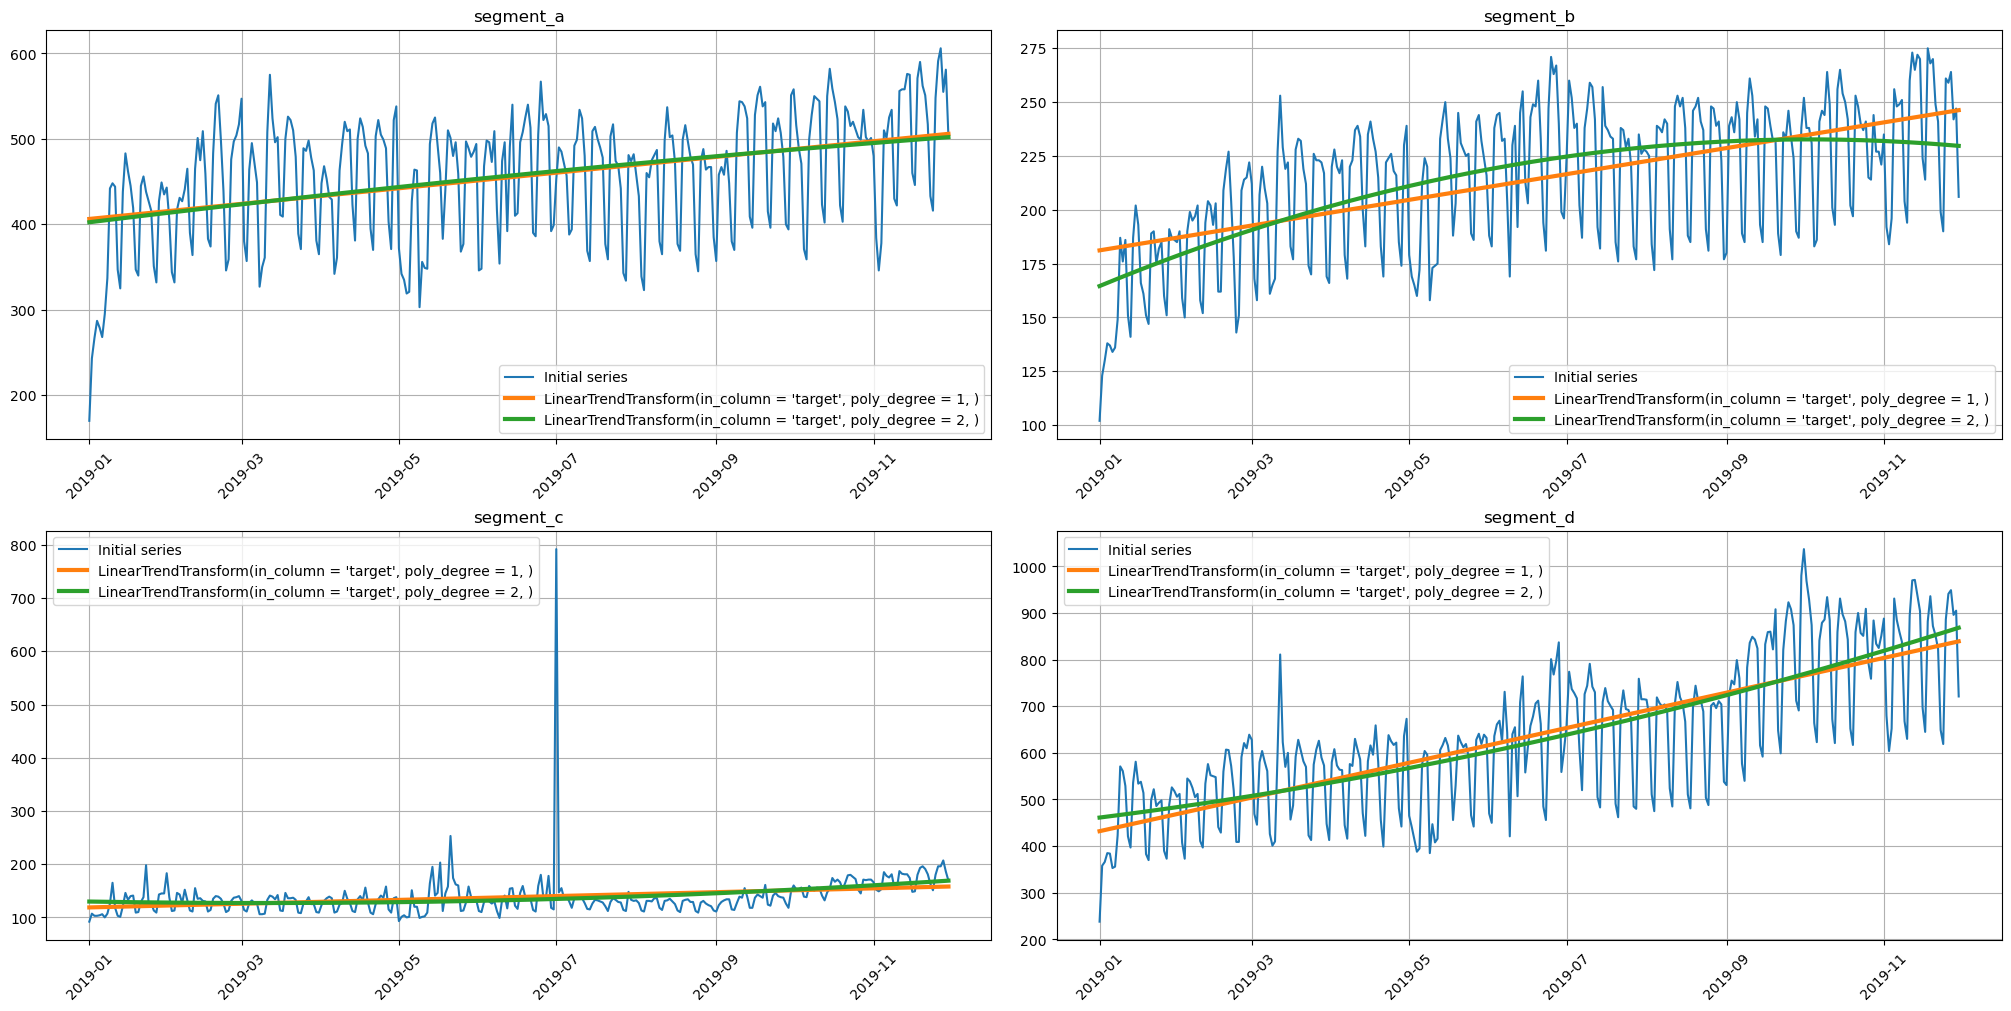

In [47]:
plot_trend(ts, trend_transform=trends)

### 2.7 Seasonality <a class="anchor" id="section_2_7"></a>

Our library provide several methods for seasonality analysis. 

In [48]:
from etna.analysis import seasonal_plot
from etna.analysis import stl_plot

The second one, pics in the periodogram also shows the existence of corresponding seasonality, i.e. pick near x=52 shows the weekly seasonality (52 times a year).

`stl_plot` is a visualization of the corresponding decomposition 

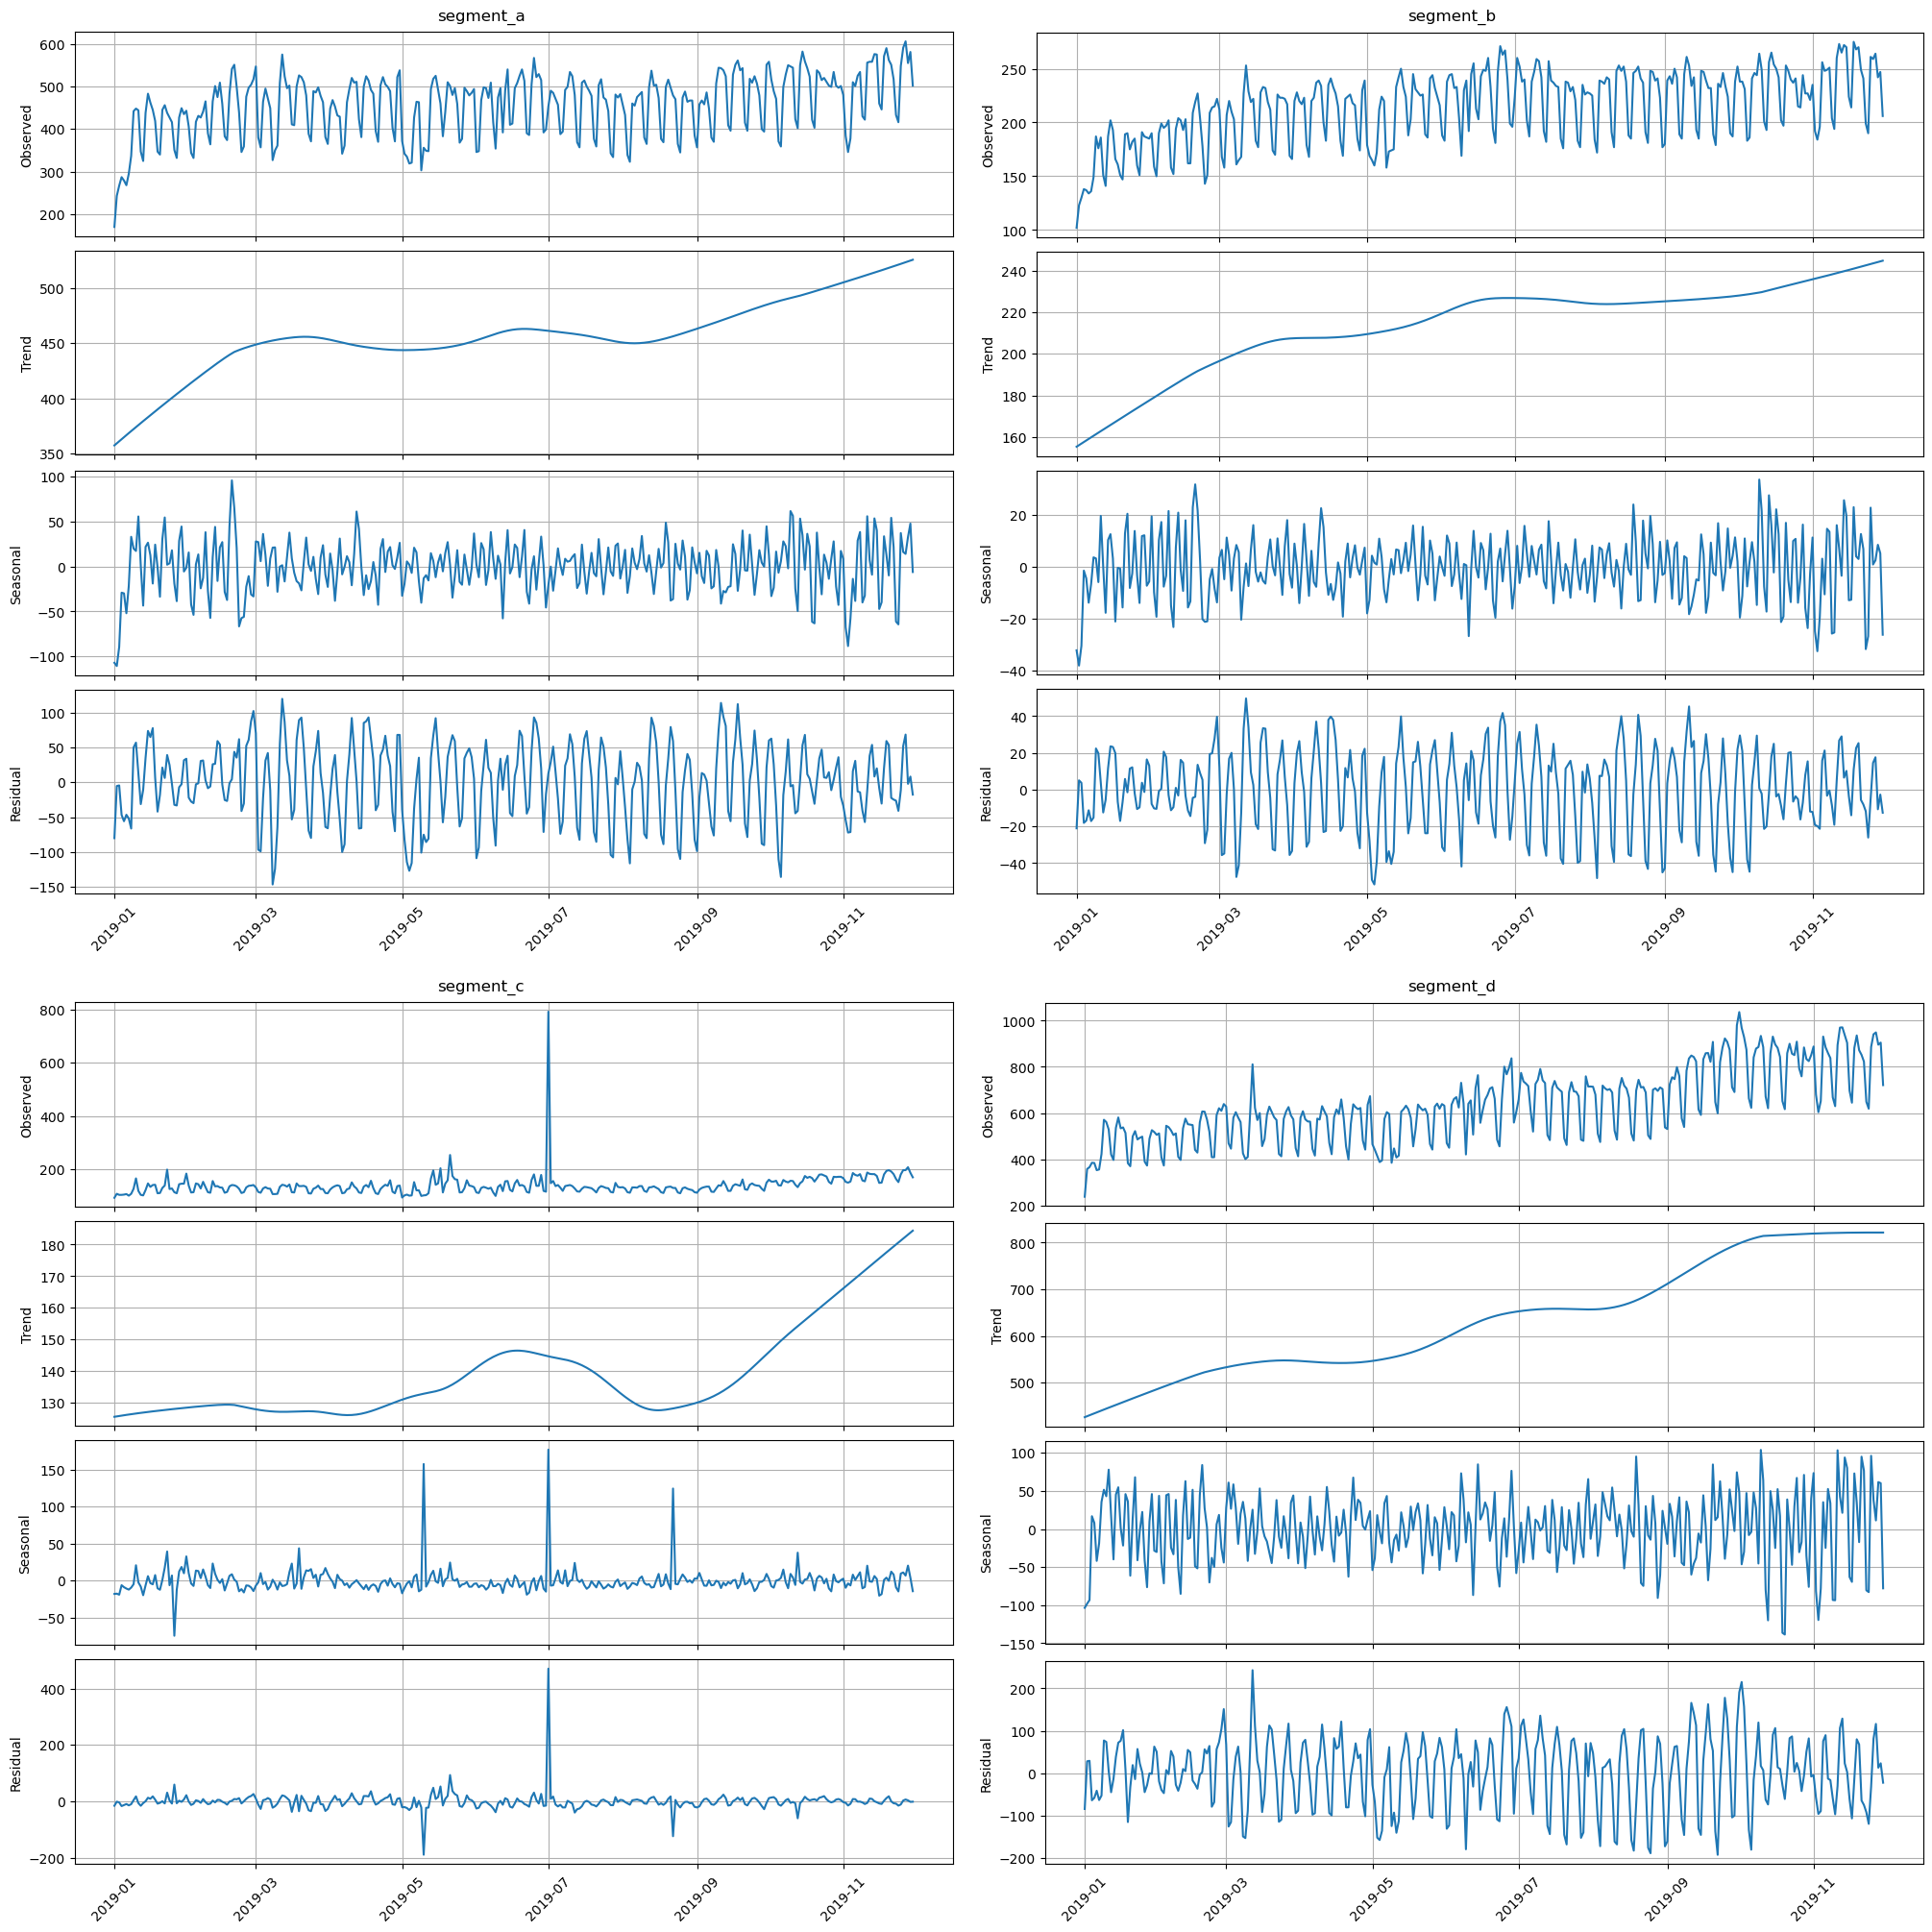

In [49]:
stl_plot(ts=ts, period=52)

The third one, `seasonal_plot` helps to visualize the a specific period of seasonality (hour, day, week, month, quarter, year). A `seasonal_plot` allows the underlying seasonal pattern to be seen more clearly, and is especially useful in identifying periods in which the pattern changes

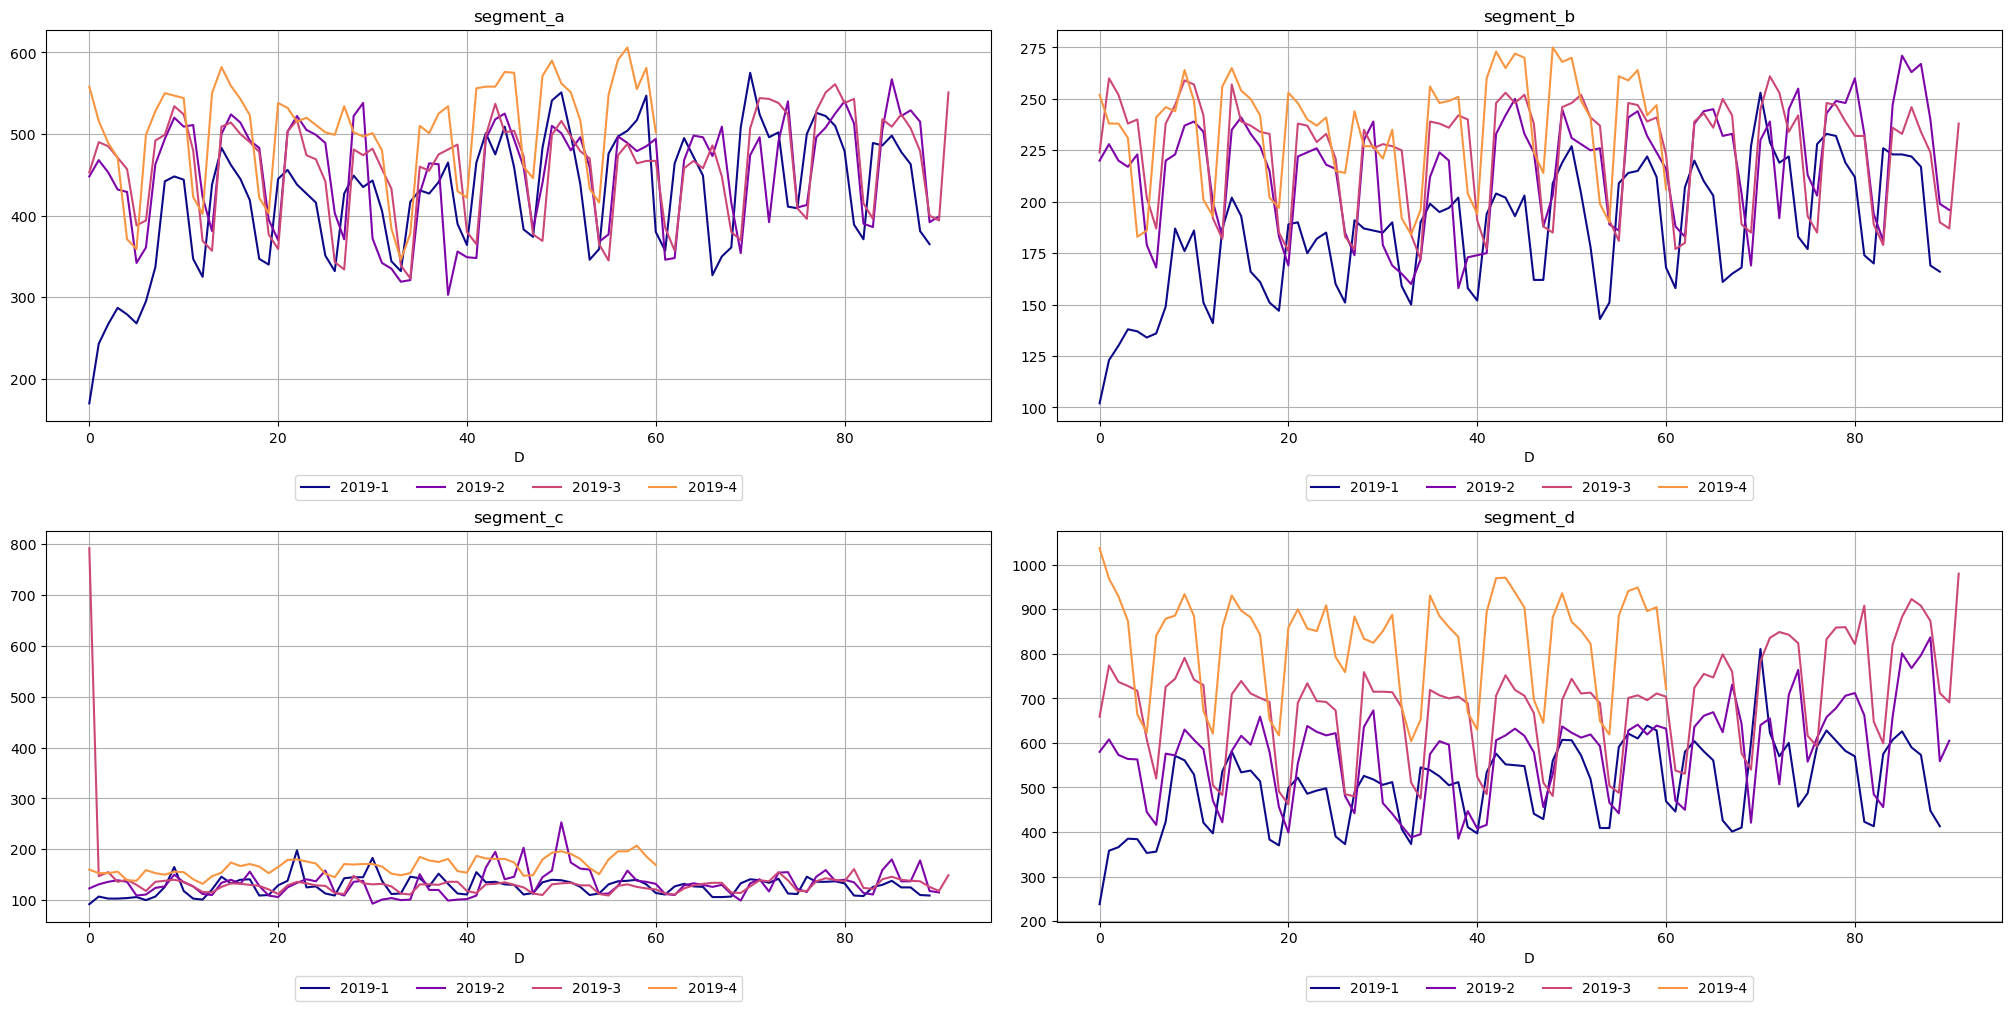

In [50]:
seasonal_plot(ts=ts, cycle="quarter")

## 3. Outliers <a class="anchor" id="chapter3"></a>

In our library, we provide two methods for outliers detection. In addition, you can easily visualize the detected outliers using ```plot_anomalies```


In [51]:
from etna.analysis import get_anomalies_density
from etna.analysis import get_anomalies_median
from etna.analysis import plot_anomalies

### 3.1 Median method<a class="anchor" id="section_3_1"></a>

To obtain the point outliers using the median method we need to specify the *window* for fitting the median model.

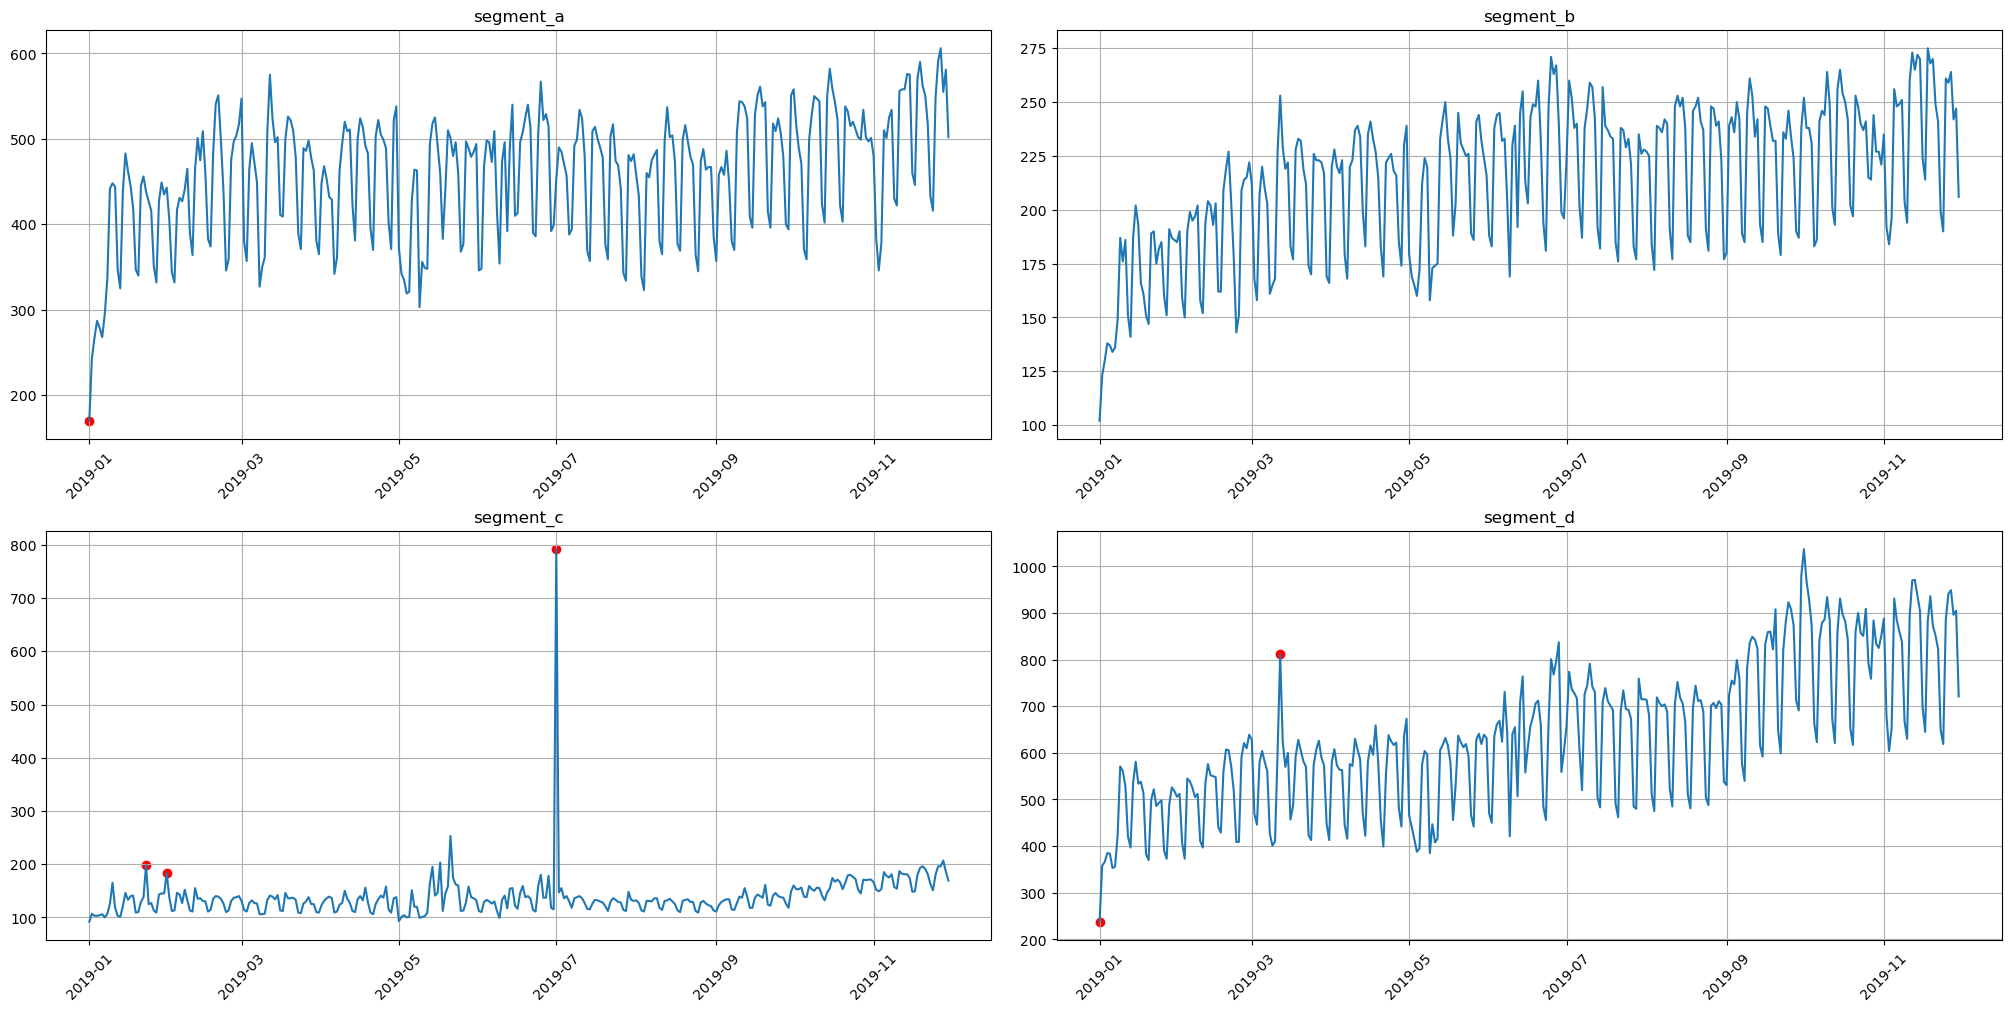

In [52]:
anomaly_dict = get_anomalies_median(ts, window_size=100)
plot_anomalies(ts, anomaly_dict)

### 3.2 Density method<a class="anchor" id="section_3_2"></a>

It is a distance-based method for outliers detection. Don't rely on default parameters)

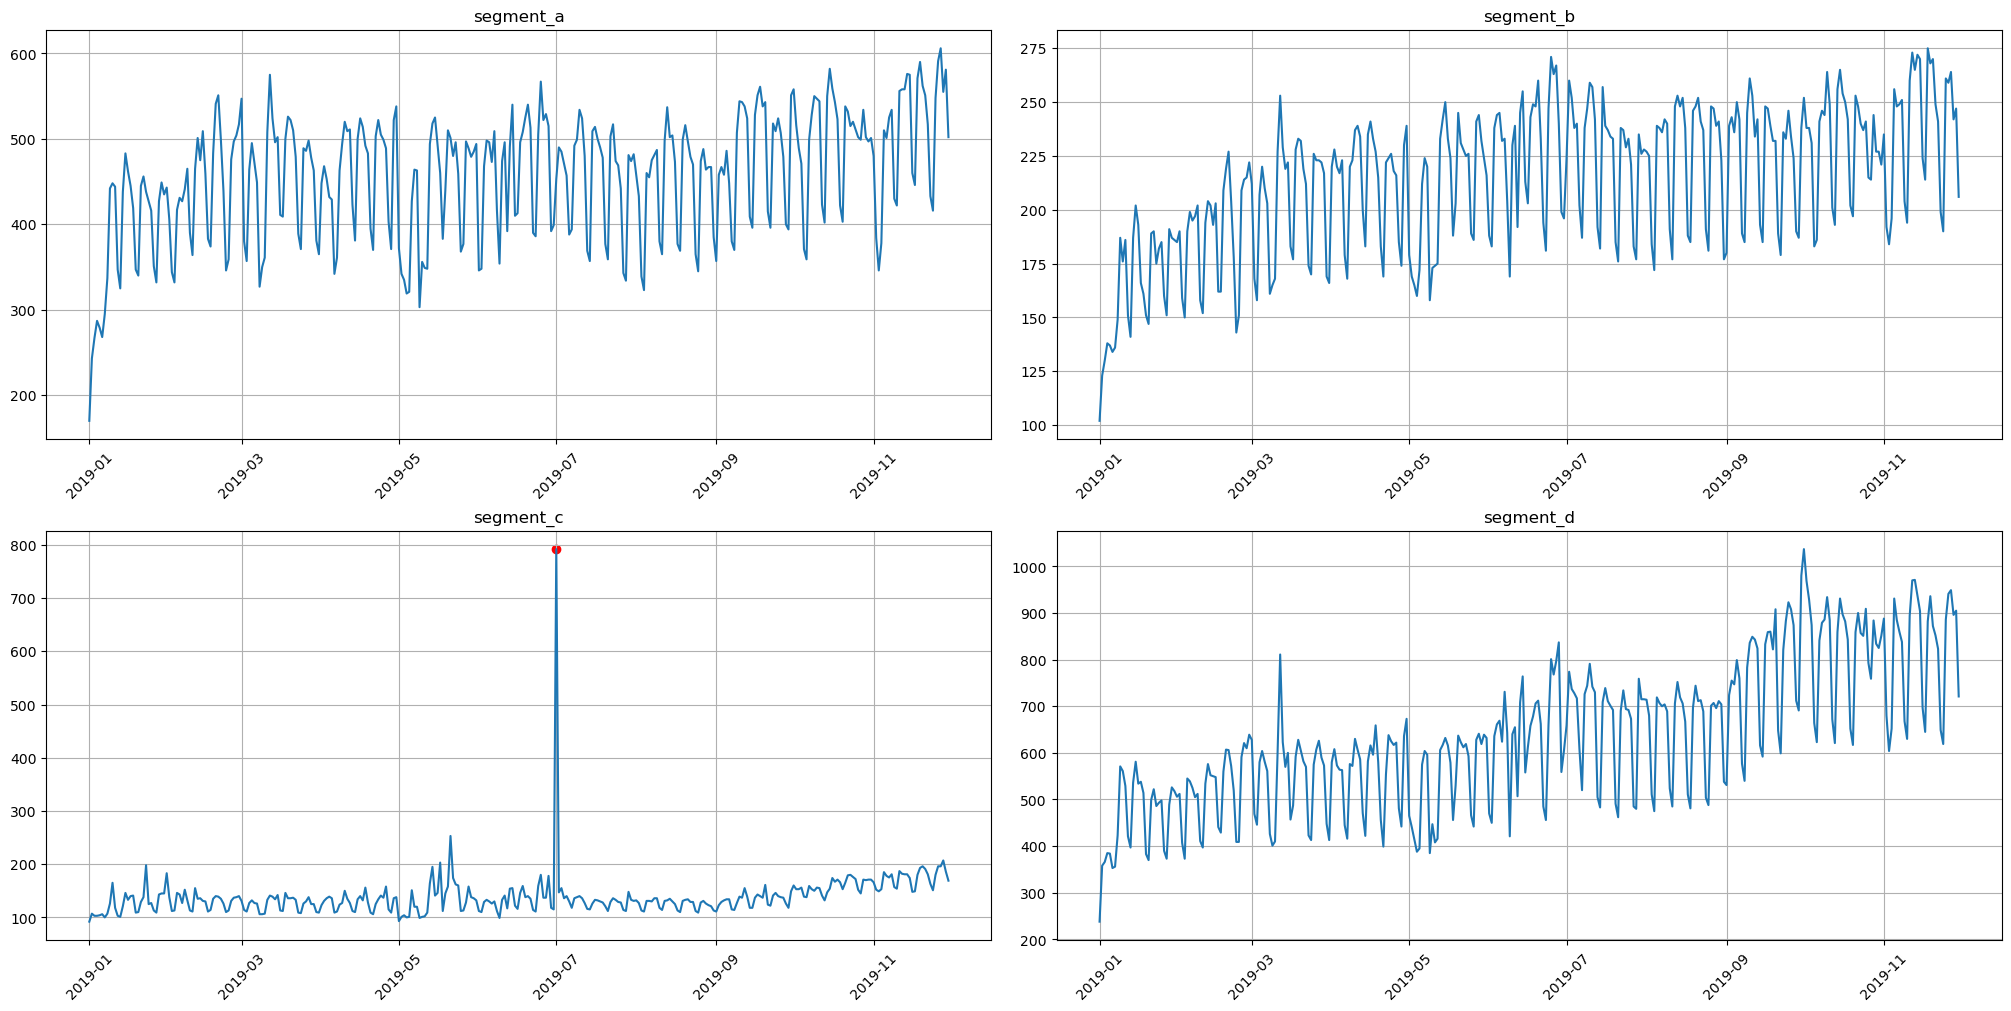

In [53]:
anomaly_dict = get_anomalies_density(ts)
plot_anomalies(ts, anomaly_dict)

The best practice here is to specify the method parameters for your data

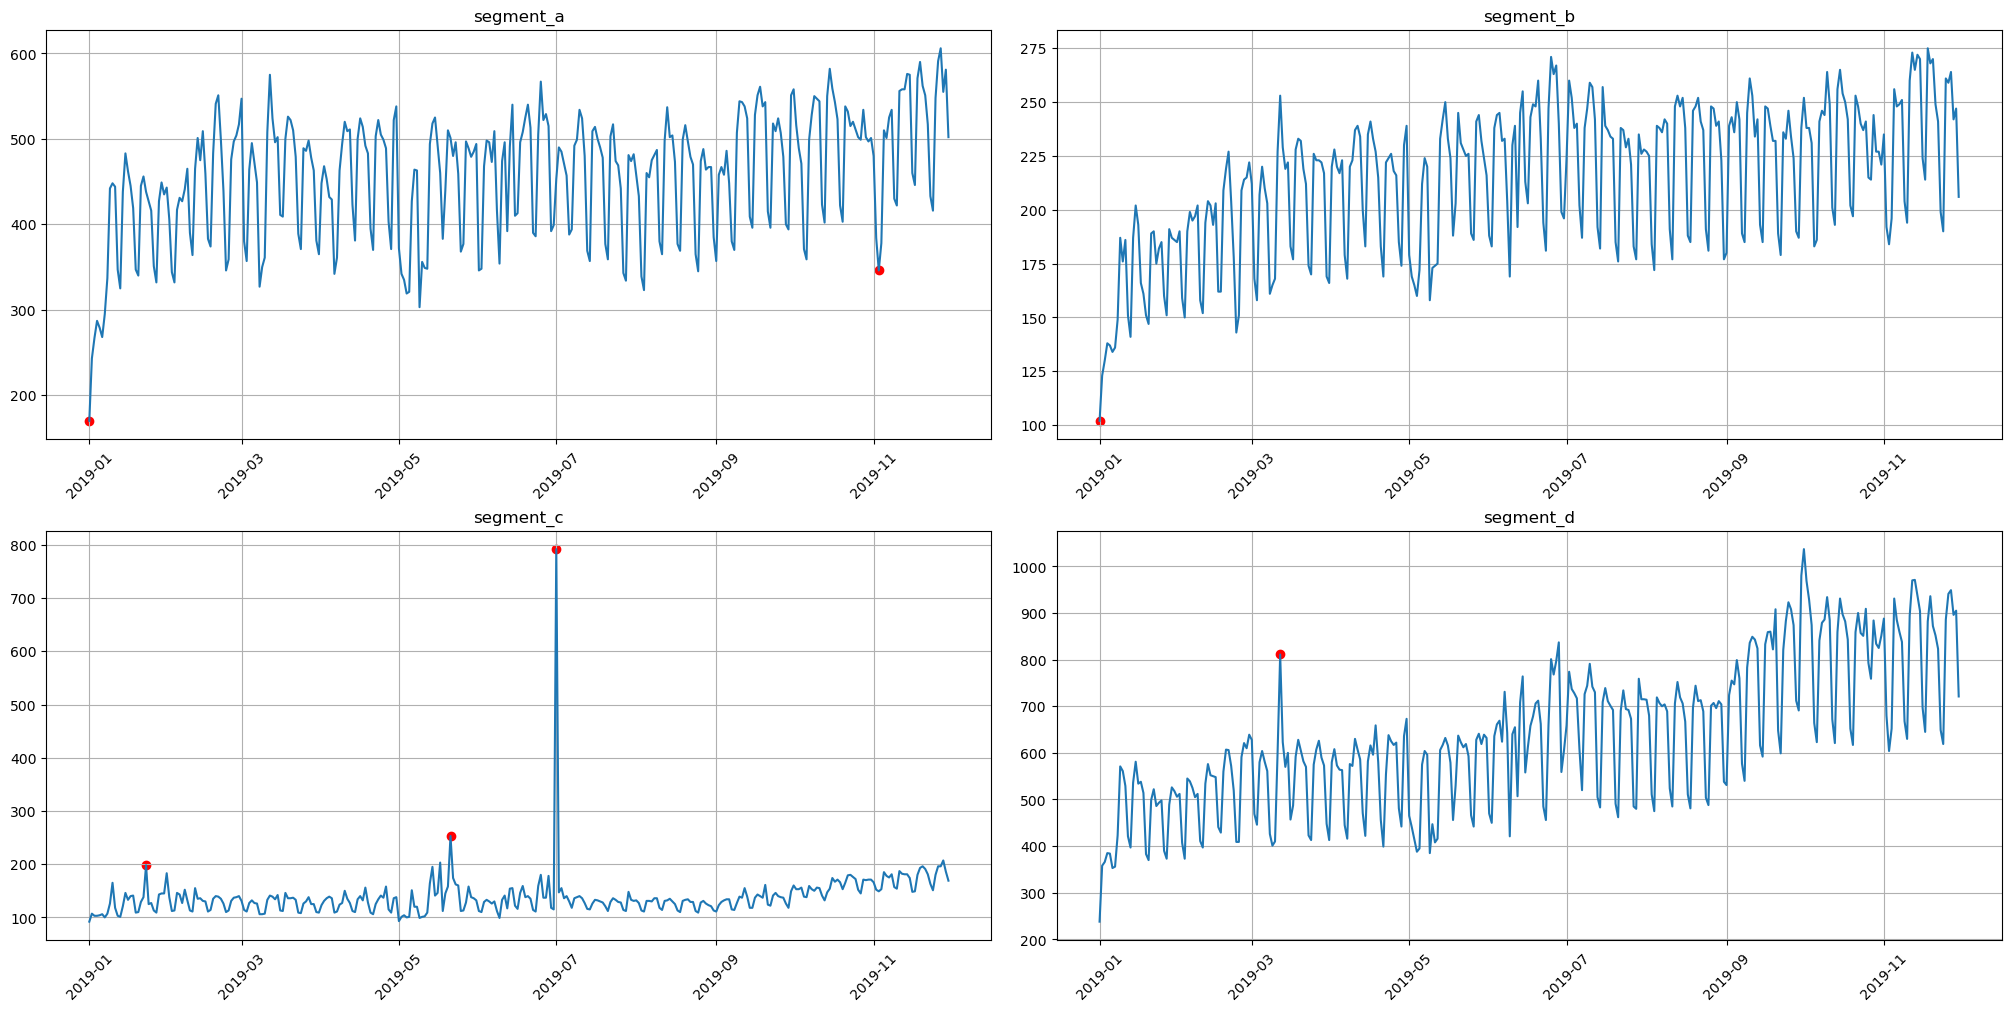

In [54]:
anomaly_dict = get_anomalies_density(ts, window_size=18, distance_coef=1, n_neighbors=4)
plot_anomalies(ts, anomaly_dict)

## 4. Change Points <a class="anchor" id="chapter4"></a>

Sometimes the series contains trend changes in history. Identification and processing of trends taking into account changes can help in forecasting

In our library we provide 2 methods for visualization change points

In [55]:
from ruptures.detection import Binseg

from etna.analysis import find_change_points
from etna.analysis import plot_change_points_interactive
from etna.analysis import plot_time_series_with_change_points

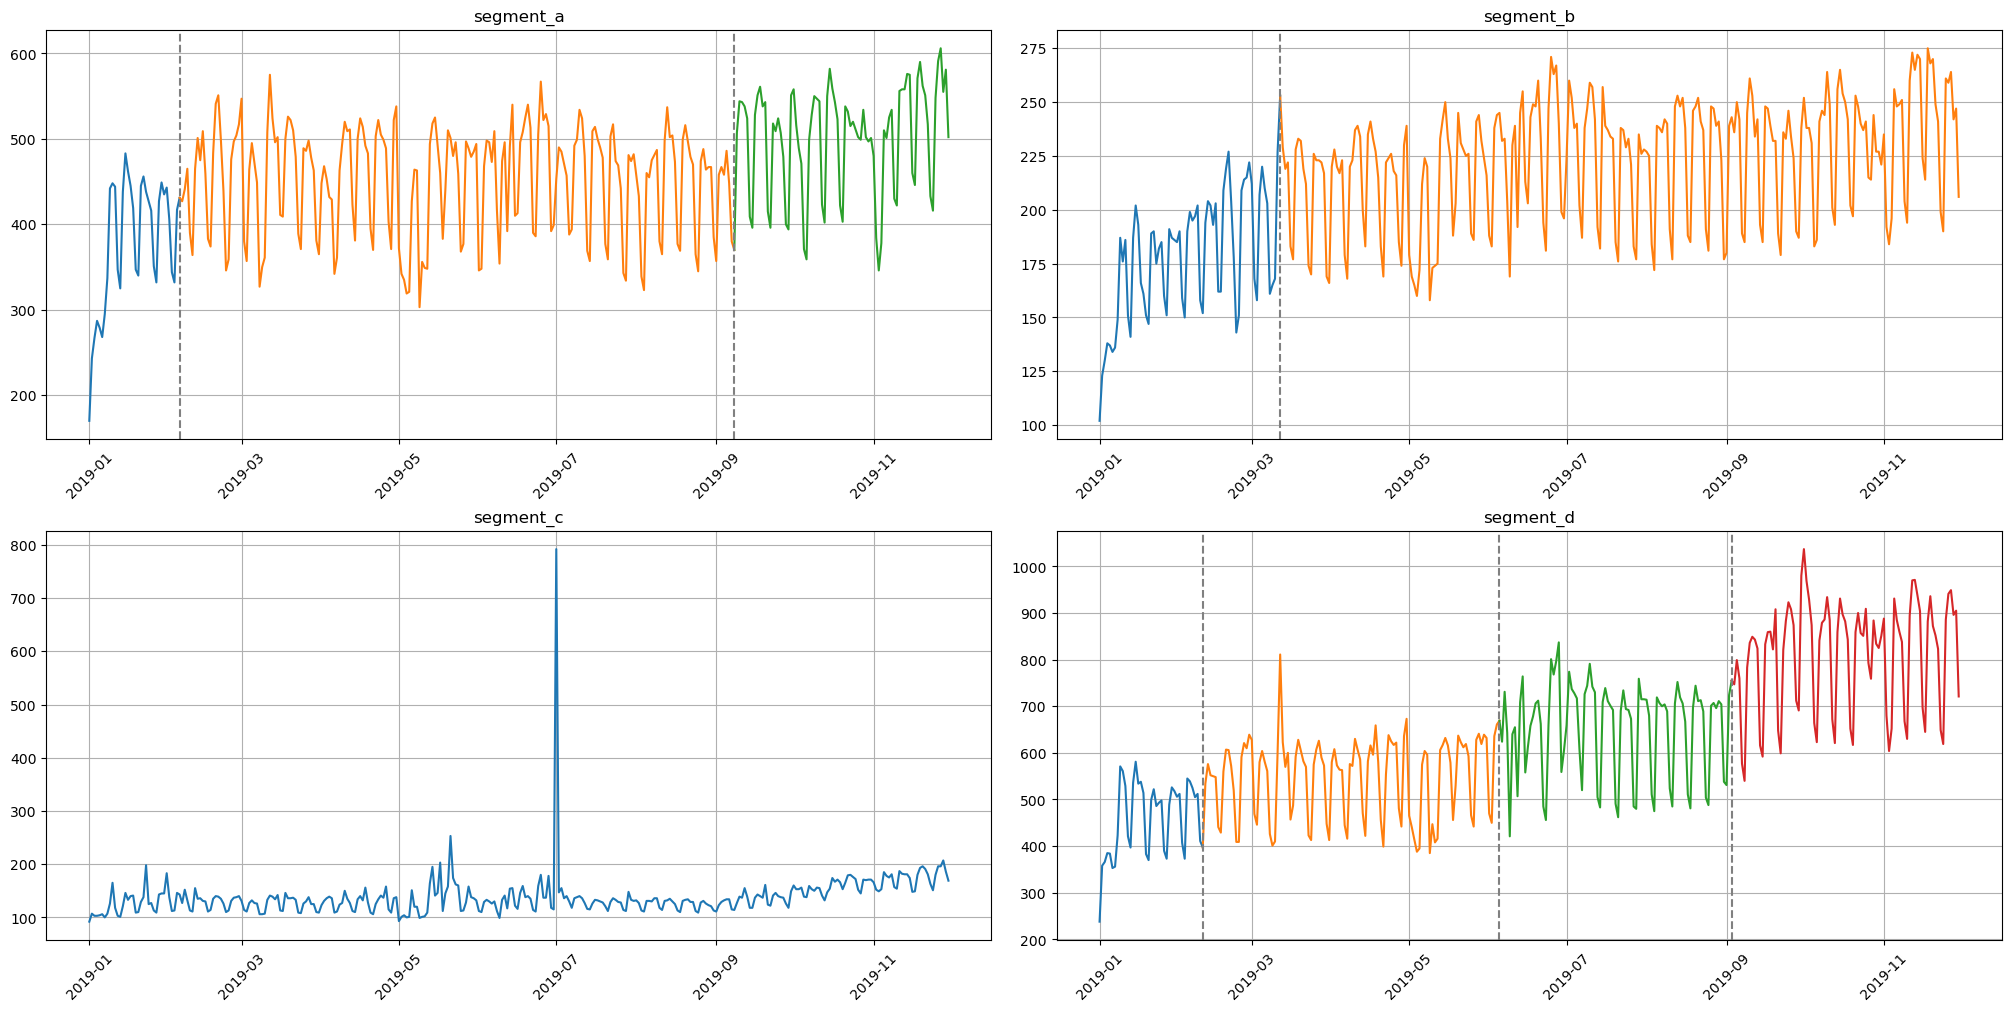

In [56]:
change_points = find_change_points(ts=ts, in_column="target", change_point_model=Binseg(), pen=1e5)
plot_time_series_with_change_points(ts=ts, change_points=change_points)

For better initialization parameters there are exist interactive EDA method.

In some cases there might be troubles with this visualisation in Jupyter notebook, try to use ```!jupyter nbextension enable --py widgetsnbextension```

In [57]:
params_bounds = {"n_bkps": [0, 8, 2], "min_size": [1, 10, 3]}
plot_change_points_interactive(
    ts=ts,
    change_point_model=Binseg,
    model="l2",
    params_bounds=params_bounds,
    model_params=["min_size"],
    predict_params=["n_bkps"],
    figsize=(20, 10),
)

interactive(children=(IntSlider(value=0, continuous_update=False, description='n_bkps', max=8, step=2, style=S…

That's all for this notebook. More features for time series analysis you can find in our documentation.